## ## Week 3-1 - Linear Regression - class notebook

This notebook gives three examples of regression, that is, fitting a linear model to our data to find trends. For the finale, we're going to duplicate the analysis behind the Washington Post story 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Part 1 - Single variable regression
We'll start with some simple data on height and weight.

In [2]:
hw = pd.read_csv("week-3/height-weight.csv")
hw

,name,height,weight
0,Joyce,51.3,50.5
1,Louise,56.3,77.0
2,Alice,56.5,84.0
3,James,57.3,83.0
4,Thomas,57.5,85.0
5,John,59.0,99.5
6,Jane,59.8,84.5
7,Jeffrey,62.5,84.0
8,Janet,62.5,112.5
9,Carol,62.8,102.5


Let's look at the distribution of each of these variables.

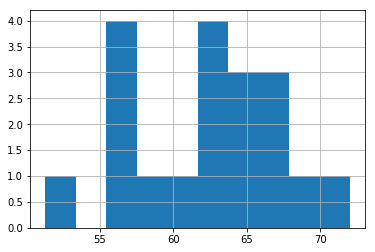

In [3]:
hw.height.hist()

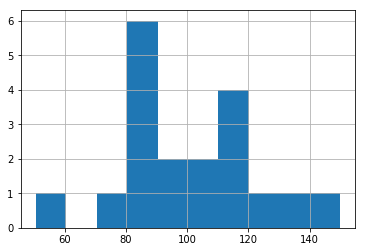

In [4]:
hw.weight.hist()

Really, the interesting thing is to look at them together. For this we use a scatter plot.

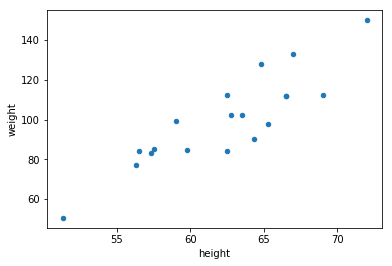

In [5]:
hw.plot(kind='scatter', x='height', y='weight')

Clearly there's a trend that relates the two. One measure of the strength of that trend is called "correlation". We can compute the correlation between every pair of columns with `corr()`, though in this case it's really only between one pair.


In [6]:
# Show the correlations! OMG
hw.corr()

# the closer to 1 the correlation is, the closer to a line are the values

,height,weight
height,1.000000,0.877785
weight,0.877785,1.000000


If you want to get better at knowing what sort of graph a correlation coefficient corresponds to, play the remarkable 8-bit game [Guess the Correlation](http://guessthecorrelation.com/)

So far so good. Now suppose we want to know what weight we should guess if we know someone is 60" tall. We don't have anyone of that height in our data, and even id we did, they could be above or below average height. We need to build some sort of *model* which captures the trend, and guesses the average weight at each height.

*ENTER THE REGRESSION*.

In [7]:
# convert pandas dataframe to a numpy array, which can be understood by sklearn

x = hw[['height']].values
y = hw[['weight']].values

In [8]:
lm = LinearRegression()
lm.fit(x,y)

/Users/km/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ok, now we've got a "linear regression." What is it? It's just a line `y=mx+b`, which we can recover like this:

In [12]:
m = lm.coef_[0]
m

In [13]:
b = lm.intercept_
b

array([-143.02691844])

We can plot this line `y=mx+b` on top of the scatterplot to see it.

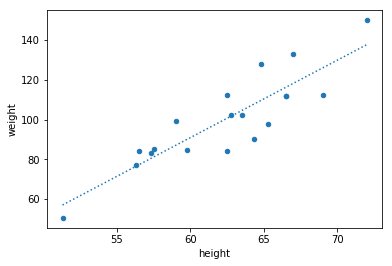

In [15]:
hw.plot(kind='scatter', x='height', y='weight')
plt.plot(hw.height, m*hw.height+b, '–')

So if we want to figure out the average weight of someone who is 60" tall, we can compute

In [16]:
m*60+b

array([90.91489769])

There's a shortcut for this, which will come in handy when we add variables

In [17]:
lm.predict(60)

array([[90.91489769]])

## Part 2 - Multi-variable regression 

We can do essentially the same trick with one more independent variable. Then our regression equation is `y =  m1*x1 + m2*x2 + b`. We'll use one of the built-in `sklearn` data test as demonstration data.

In [3]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
diabetes = datasets.load_diabetes()

print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b89f128>,
      dtype=object)

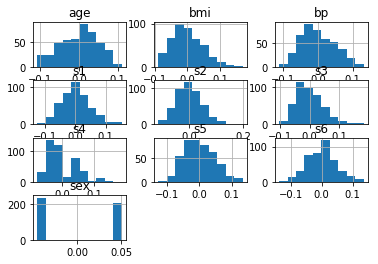

In [4]:
# take a look at the predictive (independent) variables
# The variables to be used for prediction
df = pd.DataFrame(diabetes.data,
                  columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df.hist()

In [5]:
# take a look at the "target" (dependent) variable


/Users/km/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# fit a regression
# Which columns do we want to use to try to predict? I’m choosing age and BMI here
# (BMI is “body mass index”, it’s a measure of weight compared to height)
indices = (0, 2)

x = diabetes.data[:, indices]
y = diabetes.target

lm2 = LinearRegression()
lm2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ok awesome, we've fit a regression with multiple variables. What did we get? Let's check the coefficients

In [7]:
lm2.coef_

array([133.01372901, 924.81645876])

Now we have *two* coefficients. They're both positive, which means that both age and BMI are associated with increased disease progression. We have an intercept too, the predicted value of the target variable when both age and BMI are zero (which never happens, but that's the way the math works)

In [8]:
lm2.intercept_

152.13348416289674

To really see what's going on here, we're going to plot the whole thing in beautiful 3D. Now instead of a regression line, we have a regression *plane.* Are you ready for this?

In [9]:
# Helpful function that we'll use later for making more 3D regression plots
def plot_regression_3d(x, y, z, model, elev=30, azim=30, xlab=None, ylab=None):
    fig = plt.figure()
    ax = Axes3D(fig, elev=elev, azim=azim)

    # This looks gnarly, but we're just taking four points at the corners of the plot, 
    # and using predict() to determine their vertical position
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    corners_x = np.array([[xmin, xmin], [xmax, xmax]])
    corners_y = np.array([[ymin, ymax], [ymin, ymax]])
    corners_z = model.predict(np.array([[xmin, xmin, xmax, xmax], [ymin, ymax, ymin, ymax]]).T).reshape((2, 2))
    ax.plot_surface(corners_x, corners_y, corners_z, alpha=0.5)

    ax.scatter(x, y, z, alpha=0.3)

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)



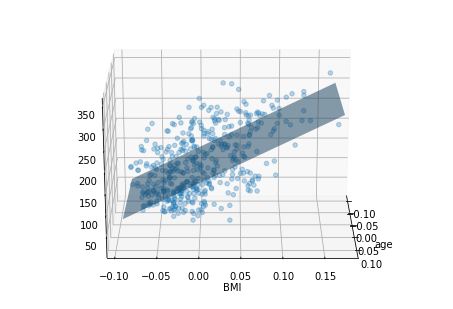

In [12]:
# Now plot our diabetes data
plot_regression_3d(x[:, 0], x[:, 1], y, lm2, elev=20, azim=0, xlab='age',
                   ylab='BMI')


## Part 3 - Analysis of 2016 voters

Aside from prediction, we can use regression to attempt explanations. The coefficient `m` in the above encodes a guess about the existence and strength of the relationship between `x` and `y`. If it's zero, we guess that they're unrelated. Otherwise, it tells us how they are likely to vary together.

In this section we're going to try to understand what motivated people to vote for Trump but looking at the relationship between vote and other variables in the [2016 American National Election Study data](http://electionstudies.org/project/2016-time-series-study/). 

There were quite a few statistical analyses of this "why did Trump win?" kind after the election, by journalists and researchers. 

- [Racism motivated Trump voters more than authoritarianism](https://www.washingtonpost.com/news/monkey-cage/wp/2017/04/17/racism-motivated-trump-voters-more-than-authoritarianism-or-income-inequality) - Washington Post
- [The Rise of American Authoritarianism](https://www.vox.com/2016/3/1/11127424/trump-authoritarianism) - Vox
- [Education, Not Income, Predicted Who Would Vote For Trump](https://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/) - 538
- [Why White Americans Voted for Trump – A Research Psychologist’s Analysis](https://techonomy.com/2018/02/white-americans-voted-trump-research-psychologists-analysis/) - Techonomy
- [Status threat, not economic hardship, explains the 2016 presidential vote](http://www.pnas.org/content/early/2018/04/18/1718155115) - Diana C. Mutz, PNAS
- [Trump thrives in areas that lack traditional news outlets](https://www.politico.com/story/2018/04/08/news-subscriptions-decline-donald-trump-voters-505605) - Politico
- [The Five Types of Trump Voters](https://www.voterstudygroup.org/publications/2016-elections/the-five-types-trump-
voters) - Voter Study Group

Many of these used regression, but some did not. My favoite is the Voter Study Group analysis which used clustering -- just like we learned last week. It has a good discussion of the problems with using a regression to answer this question. 

We're going to use regression anyway, along the lines of the [Washington Post piece](https://www.washingtonpost.com/news/monkey-cage/wp/2017/04/17/racism-motivated-trump-voters-more-than-authoritarianism-or-income-inequality/?utm_term=.01d9d3764f2c) which also uses ANES data. In particular, a regression on variables representing attitudes about authoritarianism and minorities.


In [14]:
# read 'anes_timeseries_2016_rawdata.csv'
anes = pd.read_csv('week-3/anes_timeseries_2016_rawdata.csv')
print(anes.shape)
anes.head()

/Users/km/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (790,1129,1131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4271, 1290)


,version,V160001,V160101,V160101f,V160101w,V160102,V160102f,V160102w,V160201,V160201f,...,V168123,V168124,V168125,V168126,V168127,V168128,V168129,V168130,V168131,V168132
0,ANES2016TimeSeries_20171219,300001,0.827,0.887,0.0,0.842,0.927,0.0,121,21,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,ANES2016TimeSeries_20171219,300002,1.080,1.160,0.0,1.013,1.084,0.0,123,23,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,ANES2016TimeSeries_20171219,300003,0.387,0.416,0.0,0.367,0.398,0.0,121,21,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,ANES2016TimeSeries_20171219,300004,0.359,0.385,0.0,0.366,0.418,0.0,118,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,ANES2016TimeSeries_20171219,300006,0.647,0.693,0.0,0.646,0.726,0.0,113,13,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


The first thing we need to do is construct indices of "authoritarianism" and "racism" from answers to the survey questions. We're following exactly what the Washington Post did here. Are "authoritarianism" and "racism" accurate and/or useful words for indices constructed of these questions? Our choice of words will hugely shape the impression that readers come away with -- even if we do the exact same calculations.

We start by dropping everything we don't need: we keep only white voters, only people who voted, and just the cols we want

In [15]:
# drop non-white voters
white_col = 'V161310a'
anes = anes[anes[white_col] == 1]
anes.shape

(3412, 1290)

In [16]:
# keep only Trump, Clinton voters
voted_col = 'V162034a'  # 1=Clinton, 2=Trump, 3=Johnson, 4=Stein, negative numbers = didn't vote or won't say
anes = anes[(anes[voted_col] == 1) | (anes[voted_col] == 2)]
anes.shape

(2037, 1290)

In [17]:
# keep only columns on authoritarian, racial scales
authoritarian_cols = ['V162239', 'V162240', 'V162241', 'V162242']
racial_cols = ['V162211', 'V162212', 'V162213', 'V162214']
anes = anes[[voted_col] + authoritarian_cols + racial_cols]
anes.head()

,V162034a,V162239,V162240,V162241,V162242,V162211,V162212,V162213,V162214
0,2,2,2,1,1,1,5,5,1
1,2,1,2,2,1,3,2,4,3
7,2,2,2,2,2,4,5,5,2
13,2,2,2,2,1,2,5,4,3
14,1,1,1,2,1,4,1,2,5


Now we have to decode these values.

For the child-rearing questions, the code book tells us that 1 means the first option and 2 means the second. But 3 means both and then there are all sorts of codes that mean the question wasn't answered, in different ways. And then there's the issue that the questions have different directions: Options 1 might mean either "more" or "less" authoritarian. So we have a custom translation dictionary for each column. This is the stuff that dreams are made of, people.

In [19]:
# recode the authoritarian variables
# These variables are proxies for authoritarian attitudes. Why are these questiones about children? 
# Because that's the only way to get honest answers! It's a long story. 
# See https://www.vox.com/2016/3/1/11127424/trump-authoritarianism

# All authoritarian traits are coded 1 for first option and 2 for second
# We turn this into +1/0/-1 where +1 is the more authoritarian option, and 0 means no data

# Child trait more important: independence or respect
anes['V162239'].replace({1: -1, 2: 1, 3: 0, -6: 0, -7: 0, -8: 0, -9: 0},
                        inplace=True)

# Child trait more important: curiosity or good manners
anes['V162240'].replace({1: -1, 2: 1, 3: 0, -6: 0, -7: 0, -8: 0, -9: 0},
                        inplace=True)

# Child trait more important: obedience or self-reliance
anes['V162241'].replace({1: 1, 2: -1, 3: 0, -6: 0, -7: 0, -8: 0, -9: 0},
                        inplace=True)

# Child trait more important: considerate or well-behaved
anes['V162242'].replace({1: -1, 2: 1, 3: 0, -6: 0, -7: 0, -8: 0, -9: 0},
                        inplace=True)

In [20]:
# recode the racial variables
# All racial questions are coded on a five point scale, 1=agree strongy, 5=disagree strongly
# We recode so that least tolerant = +2 and most tolerant =-2

# Agree/disagree: blacks shd work way up w/o special favors
anes['V162211'].replace(
  {1: 2, 2: 1, 3: 0, 4: -1, 5: -2, -6: 0, -7: 0, -8: 0, -9: 0}, inplace=True)

# Agree/disagree: past slavery make more diff for blacks
anes['V162212'].replace(
  {1: -2, 2: -1, 3: 0, 4: 1, 5: 2, -6: 0, -7: 0, -8: 0, -9: 0}, inplace=True)

# Agree/disagree: blacks have gotten less than deserve
anes['V162213'].replace(
  {1: -2, 2: -1, 3: 0, 4: 1, 5: 2, -6: 0, -7: 0, -8: 0, -9: 0}, inplace=True)

anes['V162214'].replace(
  {1: 2, 2: 1, 3: 0, 4: -1, 5: -2, -6: 0, -7: 0, -8: 0, -9: 0}, inplace=True)

In [21]:
# check the results
anes.head()

,V162034a,V162239,V162240,V162241,V162242,V162211,V162212,V162213,V162214
0,2,-1,-1,1,-1,2,2,2,2
1,2,-1,-1,-1,-1,0,-1,1,0
7,2,-1,-1,-1,-1,-1,2,2,1
13,2,-1,-1,-1,-1,1,2,1,0
14,1,-1,-1,-1,-1,-1,-2,-1,-2


Finally, add the authority and racial columns together to form the composite indexes.

In [22]:
# sum each group of columns. End up with vote, authority, racial columns
anes['authority'] = anes[authoritarian_cols].sum(axis=1)
anes['racial'] = anes[racial_cols].sum(axis=1)
anes['vote'] = anes[voted_col]
anes = anes[['vote', 'authority', 'racial']]
anes.head(10)

,vote,authority,racial
0,2,-2,8
1,2,-4,0
7,2,-4,4
13,2,-4,4
14,1,-4,-6
16,1,-4,-4
17,2,-2,4
18,1,-4,-6
21,2,-4,4
22,1,-4,-1


Data prepared at last! Let's first look at the scatter plots

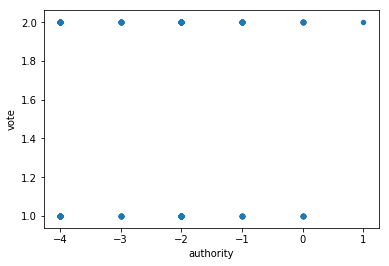

In [25]:
anes.plot(kind='scatter', x='authority', y='vote')

Er, right... all this says is that we've got votes for both candidates at all levels of authoritarianism. To get a sense of how many dots in each point, we can add some jitter and make the points a bit transparent.

In [26]:
# function to add noise to the values in the array

# add a  noise to the values in the array
def jitter(arr):
  # pick a standard deviation for the jitter of 3% of the data range
  stdev = .02 * (max(arr) - min(arr))
  return arr + np.random.randn(len(arr)) * stdev

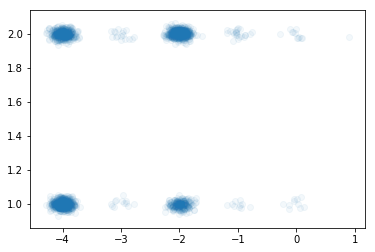

In [27]:
# plot vote vs authoritarian variables with jitter
plt.scatter(x=jitter(anes.authority), y=jitter(anes.vote), alpha=0.05)

Note that, generally, as you move to the right (more authoritarian) there are more Trump voters. We can do this same plot with the racial axis.

In [9]:
# plot vote vs racial variables with jitter

# ... oh fuck it, this is just copy-pasting stuff from the class notebook, 
# I'd rather just keep listening to the lecture instead of wasting brainpower
#  on copy-pasting

Similar deal. The axis is smoother because we are summing numbers from a five point agree/disagree scale, rather than just the two-option questions of the authoritarianism subplot. 

Now in glorious 3D.

In [10]:
# 3D plot of both sets of vars

Same problem: everything is on top of each other. Same solution.

In [11]:
# jittered 3D plot

You can definitely see the change alog both axes. But which factor matters more? Let's get quantitative by fitting a linear model. Regression to the rescue!

In [36]:
# This is some drudgery to convert the dataframe into the format that sklearn needs: 


In [12]:
# This does the actual regression


In [13]:
# call plot_regression_3d

Well that looks cool but doesn't really clear it up for me. Let's look at the coefficients.


Looks like the coefficient on `racial` is higher. But wait, we choose the numbers that we turned each response into! We could have coded `racial` on a +/-1 scale instead of a +/-2 scale, or a +/-10 scale. So... we could get any number we want just be changing how we convert the data.

To fix this, we're going to standardize the values (both dependent and independent) to have mean 0 and standard deviation 1. This gives us [standardized coefficients](https://en.wikipedia.org/wiki/Standardized_coefficient).

In [14]:
# normalize the columns and take a look

In [15]:
# fit another regression

What we have now is the same data, just scaled in each direction

In [16]:
# call plot_regression_3d

Finally, we can compare the coefficients directly. It doesn't matter what range we used to code the survey answers, because we divided it out during normalization.


So there we have it. For white voters in the 2016 election, the standardized regression coefficient on racial factors is quite a bit bigger than the standardized coeffiecient on authoritrianism. But what does this actually mean?

In [17]:
# what's the new intercept?